In [50]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import trange,tnrange
from sklearn.datasets import make_blobs

In [3]:
def find_closest_centroids(X, centroids):
    k = centroids.shape[0]
    ids = np.zeros(X.shape[0], dtype  = int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(k):
            dist_k = np.linalg.norm(X[i]-centroids[j])
            distance.append(dist_k)
        
        ids[i] = np.argmin(distance)
    return ids

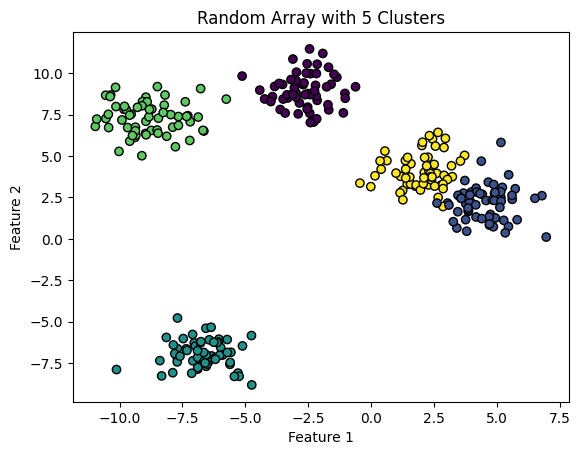

In [92]:
X, y = make_blobs(n_samples=300, n_features=2, centers=5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Random Array with 5 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [93]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[-0.62301172  9.18886394]
 [ 0.54371399  5.3052056 ]
 [-2.30033403  7.054616  ]
 [ 4.41641605  2.68717018]
 [-3.83738367  9.21114736]]
The shape of X is: (300, 2)


In [94]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5],[2,3],[3,2]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [3 3 3]


In [95]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K,X.shape[1]))
    for i in trange(centroids.shape[0], desc= "Computing Centroids"):
        centroids[i] = np.mean(X[idx==i], axis = 0)
    return centroids

In [96]:
K = 3
centroids = compute_centroids(X, idx, K)
print("The centroids are:", centroids)

Computing Centroids: 100%|██████████| 3/3 [00:00<00:00, 6887.20it/s]

The centroids are: [[3.38139329 3.84441264]
 [5.26954332 1.99686162]
 [5.15492652 5.82590117]]


In [52]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m,n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids 
    idx = np.zeros(m)
    for i in  trange(max_iters,desc= "Running Kmeans"):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X,idx,K)
        if plot_progress :
            print(f"K-Means iteration {i}/{max_iters-1}")
    return centroids, idx

In [97]:
initial_centroids = np.array([[3,3],[6,2],[8,5],[2,3],[3,2]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 6811.15it/s]


K-Means iteration 0/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 9098.27it/s]


K-Means iteration 1/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 3001.08it/s]


K-Means iteration 2/9



Running Kmeans:  40%|████      | 4/10 [00:00<00:00, 35.90it/s]

K-Means iteration 3/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 9421.17it/s]


K-Means iteration 4/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 5162.86it/s]


K-Means iteration 5/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 5920.81it/s]


K-Means iteration 6/9



Running Kmeans:  80%|████████  | 8/10 [00:00<00:00, 35.40it/s]

K-Means iteration 7/9



Computing Centroids: 100%|██████████| 5/5 [00:00<00:00, 3298.45it/s]


K-Means iteration 8/9



Running Kmeans: 100%|██████████| 10/10 [00:00<00:00, 35.26it/s]

K-Means iteration 9/9


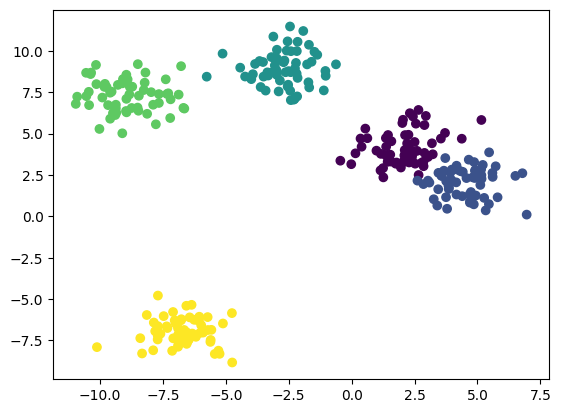

In [98]:
plt.scatter(X[:,0],X[:,1] , c = idx)

In [26]:
def kMeans_init_centroids(X, K):
    idx  =  np.random.permutation(X.shape[0])
    centroids = X[idx[:K]]
    return centroids

In [61]:
original_image  = plt.imread("/kaggle/input/a-random-image/conifers-daylight-environment-1666021 (2).jpg")

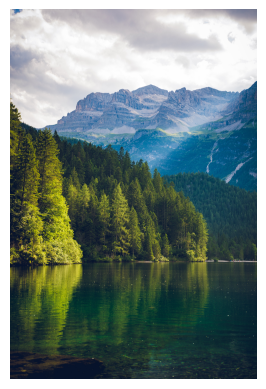

In [62]:
plt.imshow(original_image)
plt.axis('off')
plt.show()

In [63]:
print("Shape of original_img is:", original_image.shape)
original_image = cv2.resize(original_image,(128,128))
print("Shape of resized_original_img is:", original_image.shape)

Shape of original_img is: (6000, 4000, 3)
Shape of resized_original_img is: (128, 128, 3)


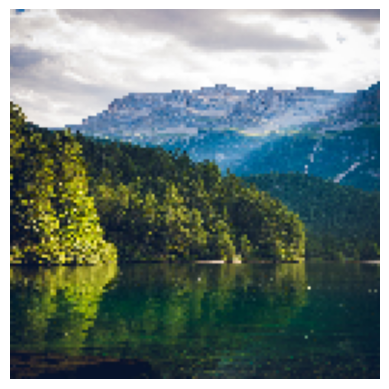

In [64]:
plt.imshow(original_image)
plt.axis('off')
plt.show()

In [81]:
original_image = original_image / 255
X_img = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], 3))

In [85]:
K = 16                       
max_iters = 10               
initial_centroids = kMeans_init_centroids(X_img, K) 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

Running Kmeans: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


In [57]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [ 4  4 15 13 13]


In [86]:
X_recovered = centroids[idx,:]
X_recovered = np.reshape(X_recovered , original_img.shape)

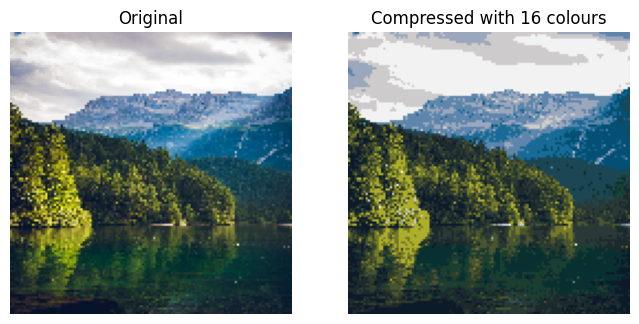

In [88]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')
ax[0].imshow(original_image)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()